# KIDNEY DISEASE DETECTION 

## IMPORT SOME NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:/Users/hp/Downloads/kidney_disease.csv")

## UNDERSTANDING THE DATA-SET

In [3]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.shape

(400, 26)

In [5]:
df.size

10400

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,400.0,199.500000,115.614301,0.000,99.75,199.50,299.25,399.000
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
bp,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
sg,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
al,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
su,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
bgr,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
bu,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
sc,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sod,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

## Checking missing value

In [8]:
df.isnull().values.any()

True

In [9]:
df.isnull().sum().sort_values(ascending=False)

rbc               152
rc                130
wc                105
pot                88
sod                87
pcv                70
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
ane                 1
appet               1
pe                  1
id                  0
classification      0
dtype: int64

In [10]:
for x in ['rc','wc','pcv']:
    df[x] = df[x].str.extract('(\d+)').astype(float)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             329 non-null    float64
 17  wc              294 non-null    flo

In [12]:
df.drop(["id"],axis=1,inplace=True)

In [13]:
for x in df.columns:
    df[f'{x}'].fillna(df[f'{x}'].mode(),inplace=True)

In [14]:
df.isnull().sum().sort_values(ascending=False)

rbc               151
rc                131
wc                106
sod                86
pot                86
pcv                71
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [15]:
df.shape

(400, 25)

## Replace Incorrect Values

In [16]:
df.cad.value_counts()

no      362
yes      34
\tno      2
Name: cad, dtype: int64

In [17]:
df['cad'] = df['cad'].replace(to_replace='\tno',value='no')

In [18]:
df.cad.value_counts()

no     364
yes     34
Name: cad, dtype: int64

In [19]:
df.dm.value_counts()

no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64

In [20]:
df['dm'] = df['dm'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})

In [21]:
df.dm.value_counts()

no     261
yes    137
Name: dm, dtype: int64

In [22]:
df.classification.value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [23]:
df['classification'] = df['classification'].replace(to_replace = 'ckd\t', value = 'ckd')

In [24]:
df.classification.value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

In [25]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.0,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.0,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.0,no,no,no,good,no,no,ckd


## Cleaning and Preprocessing of Data

In [26]:
df=df.dropna()
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['pc']=encoder.fit_transform(df['pc'])
df['pcc']=encoder.fit_transform(df['pcc'])
df['rbc']=encoder.fit_transform(df['rbc'])
df['htn']=encoder.fit_transform(df['htn'])
df['dm']=encoder.fit_transform(df['dm'])
df['cad']=encoder.fit_transform(df['cad'])
df['appet']=encoder.fit_transform(df['appet'])
df['pe']=encoder.fit_transform(df['pe'])
df['ane']=encoder.fit_transform(df['ane'])
df['classification']=encoder.fit_transform(df['classification'])
df['ba']=encoder.fit_transform(df['ba'])
# df[['htn','dm','cad','pe','ane']] = df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
# df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
# df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
# df[['appet']] = df[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
# df['classification'] = df['classification'].replace(to_replace={'ckd':1,'notckd':0})
# e = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']
# df[e] = df[e].astype("O")
# df['classification'] = df['classification'].astype("int")

In [27]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.0,1,1,0,0,0,0,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.0,1,0,0,1,1,1,0
9,53.0,90.0,1.020,2.0,0.0,0,0,1,0,70.0,...,29.0,12100.0,3.0,1,1,0,1,0,1,0
11,63.0,70.0,1.010,3.0,0.0,0,0,1,0,380.0,...,32.0,4500.0,3.0,1,1,0,1,1,0,0
14,68.0,80.0,1.010,3.0,2.0,1,0,1,1,157.0,...,16.0,11000.0,2.0,1,1,1,1,1,0,0


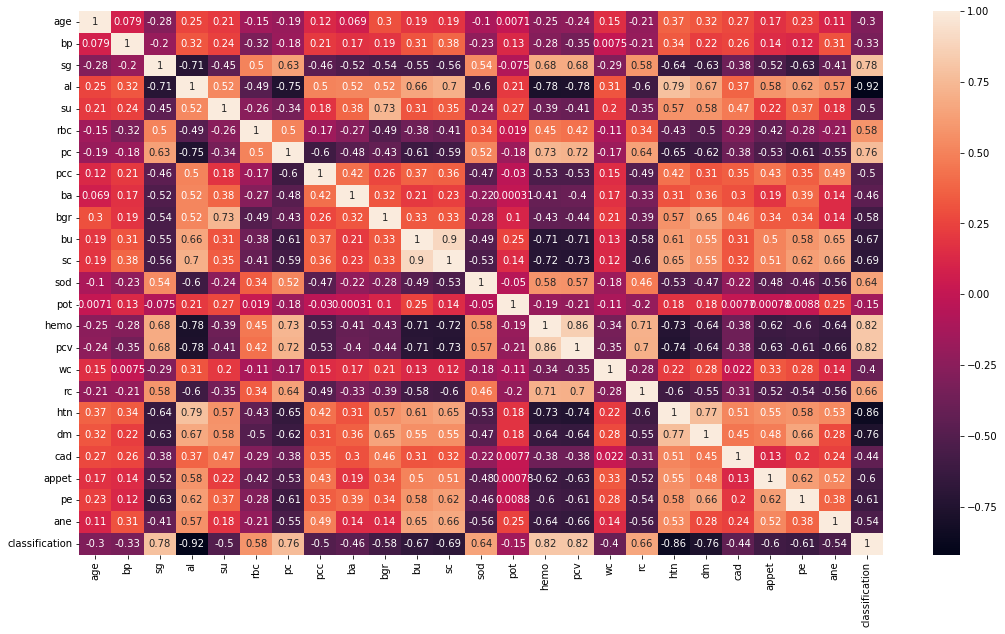

In [28]:
# Visualization
corr = df.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr, annot=True)
plt.show()

## EXPLORATORY DATA ANALYSIS ON CATEGORICAL DATA

In [29]:
cat_cols = [col for col in df.columns if df[col].dtypes == 'O']
print('Number of Categorical Variables : ', len(cat_cols))
print(cat_cols)

Number of Categorical Variables :  0
[]


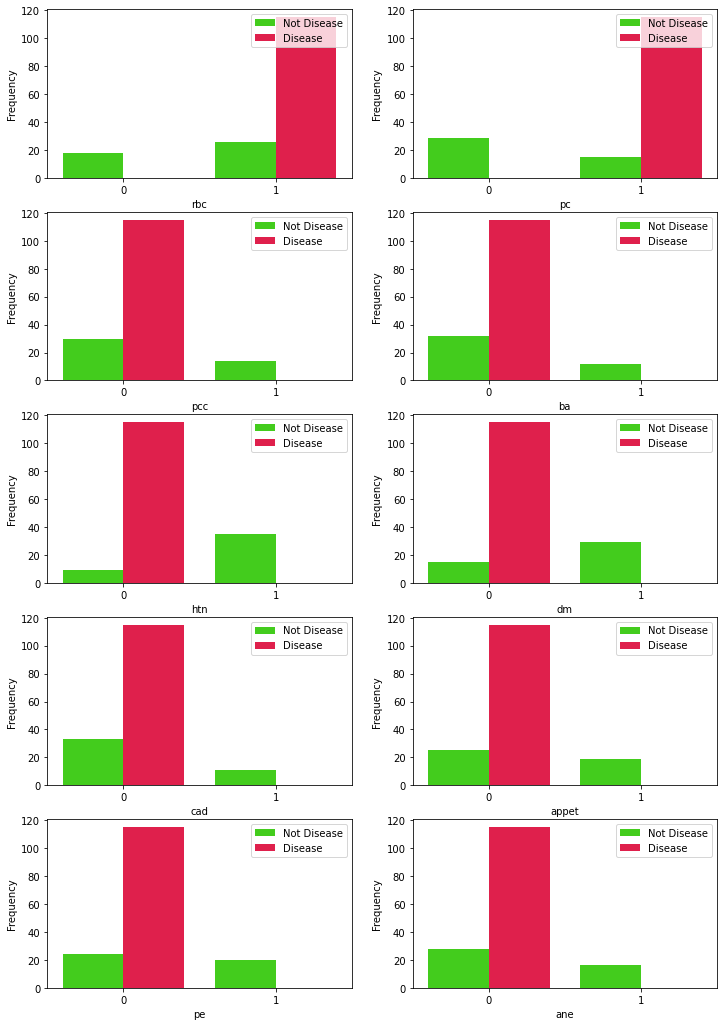

In [30]:
fig, axes = plt.subplots(5, 2, figsize=(12,18))
fs = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
for i, axi in enumerate(axes.flat):
    sns.countplot(x=fs[i], hue='classification', data=df, palette='prism', ax=axi) 
    axi.set(ylabel='Frequency')
    axi.legend(["Not Disease", "Disease"])


## ANALYSIS of NUMERICAL VARIABLE

In [31]:
num_cols = [col for col in df.columns if df[col].dtypes != 'O' and col not in "id"]
print('Number of numeric variables: ', len(num_cols))

num_cols

Number of numeric variables:  25


['age',
 'bp',
 'sg',
 'al',
 'su',
 'rbc',
 'pc',
 'pcc',
 'ba',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

## ANALYSIS of DEPENDENT VARIABLE (TARGET ANALYSIS)

In [32]:
df["classification"].value_counts()

1    115
0     44
Name: classification, dtype: int64

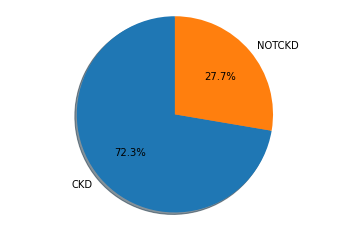

In [33]:
fig1, ax1 = plt.subplots()
ax1.pie(df["classification"].value_counts(),  labels=['CKD','NOTCKD'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [34]:
cat_cols = [col for col in df.columns if df[col].dtypes == 'O']
print('Number of Categorical Variables : ', len(cat_cols))
cat_cols

Number of Categorical Variables :  0


[]

## ONE-HOT ENCODING

In [35]:
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df= pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns
df, cat_cols = one_hot_encoder(df, nan_as_category= True)

In [36]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.0,1,1,0,0,0,0,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.0,1,0,0,1,1,1,0
9,53.0,90.0,1.020,2.0,0.0,0,0,1,0,70.0,...,29.0,12100.0,3.0,1,1,0,1,0,1,0
11,63.0,70.0,1.010,3.0,0.0,0,0,1,0,380.0,...,32.0,4500.0,3.0,1,1,0,1,1,0,0
14,68.0,80.0,1.010,3.0,2.0,1,0,1,1,157.0,...,16.0,11000.0,2.0,1,1,1,1,1,0,0


## MODELING

In [37]:
X = df.drop('classification', axis=1)
y = df[["classification"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [39]:
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train, y_train)
DecisionTree_pred = DecisionTree.predict(X_test)
acc_DecisionTree = round(DecisionTree.score(X_test, y_test) * 100, 2)
acc_DecisionTree

96.88

In [40]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,DecisionTree_pred)
score

0.96875

In [41]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,DecisionTree_pred)
print(cm)

[[ 9  1]
 [ 0 22]]



Precision: 1.0
Accuracy: 1.0
Recall: 1.0
F1-score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        22

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32


Confusion Matrix: 
[[10  0]
 [ 0 22]]


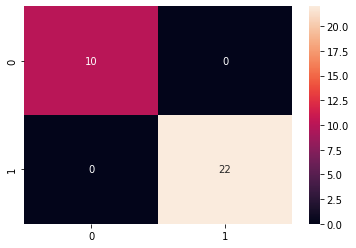

In [42]:
RandomForest = RandomForestClassifier()
RandomForest.fit(X_train, y_train)
RandomForest_pred = RandomForest.predict(X_test)
acc_RandomForest = round(RandomForest.score(X_test, y_test) * 100, 2)
acc_RandomForest
from sklearn import metrics
print('\nPrecision: ' + str(metrics.precision_score(y_test, RandomForest_pred)))
print('Accuracy: ' + str(metrics.accuracy_score(y_test, RandomForest_pred)))
print('Recall: ' + str(metrics.recall_score(y_test, RandomForest_pred)))
print('F1-score: ' + str(metrics.f1_score(y_test, RandomForest_pred)))

#display classification report for Random Forest
print('\nClassification Report:\n' + str(metrics.classification_report(y_test, RandomForest_pred)))

#display confusion matrix
print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(y_test, RandomForest_pred)))
#plot confusion matrix
sns.heatmap(metrics.confusion_matrix(y_test, RandomForest_pred), annot = True)
plt.show()

In [43]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,RandomForest_pred)
score

1.0

The best parameters are:
 {'C': 1, 'gamma': 'scale', 'kernel': 'rbf', 'shrinking': True}

The best model after gridsearch is:
 SVC(C=1, random_state=0)

Precision: 1.0
Accuracy: 1.0
Recall: 1.0
F1-score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        22

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32


Confusion Matrix: 
[[10  0]
 [ 0 22]]


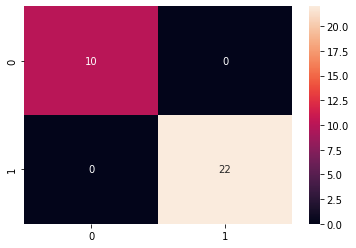

In [44]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

#initialise the Support Vector Model
support_vector_machine_model = SVC(random_state = 0)

#defining the svc parameters for grid search
parameters_grid = {'kernel': ['poly', 'rbf', 'linear', 'sigmoid'], 
                   'C': [0.1, 1, 10, 100, 1000], 
                   'gamma': ['scale', 'auto'], 
                   'shrinking': [True, False]}

#apply exhaustice gridsearch to find the optimal solution
svm_grid_search = GridSearchCV(support_vector_machine_model, parameters_grid, scoring = 'accuracy')
#fit the data to the grid
svm_grid_search.fit(X_train,y_train)

#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(svm_grid_search.best_params_))

#print the best model after gridsearch
print('\nThe best model after gridsearch is:\n ' + str(svm_grid_search.best_estimator_))

#svm predictions on test features
svm_prediction = svm_grid_search.predict(X_test)

#display SVM classification Metrices for SVM
print('\nPrecision: ' + str(metrics.precision_score(y_test, svm_prediction)))
print('Accuracy: ' + str(metrics.accuracy_score(y_test, svm_prediction)))
print('Recall: ' + str(metrics.recall_score(y_test, svm_prediction)))
print('F1-score: ' + str(metrics.f1_score(y_test, svm_prediction)))

#display classification report for SVM
print('\nClassification Report:\n' + str(metrics.classification_report(y_test, svm_prediction)))

#display confusion matrix
print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(y_test, svm_prediction)))
#plot confusion matrix
sns.heatmap(metrics.confusion_matrix(y_test, svm_prediction), annot = True)
plt.show()

In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test,y_test)

1.0